In [23]:
import os

import cv2
import numpy
import paddle
from matplotlib import pyplot
from paddleocr import PaddleOCR

In [13]:
%load_ext dotenv
%dotenv
%matplotlib inline

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [14]:
paddle.disable_signal_handler()

In [15]:
project_root: str = os.environ.get("PROJECT_ROOT", "")
image_path: str = "test_image.jpg"

In [16]:
image = cv2.imread(image_path)

(-0.5, 639.5, 639.5, -0.5)

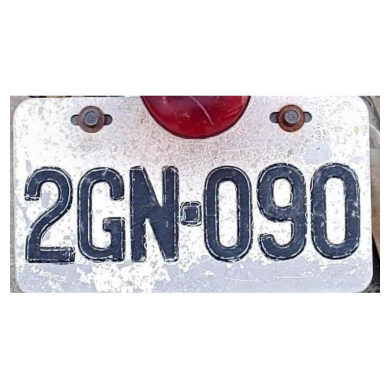

In [17]:
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
pyplot.axis("off")

In [18]:
reader = PaddleOCR(
	lang="en",
	device="cpu",
	use_angle_cls=True,
	max_text_length=8,
	use_space_char=False,
	binarize=True,
	savefile=True,
	image_orientation=True,
	invert=True,
)

[2024/12/26 14:48:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/hermeschen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/hermeschen/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max

In [19]:
result = reader.ocr(image)

[2024/12/26 14:48:32] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05326366424560547
[2024/12/26 14:48:32] ppocr DEBUG: cls num  : 1, elapsed : 0.0029649734497070312
[2024/12/26 14:48:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01703476905822754


In [26]:
result[0][0][0]

[[17.0, 264.0], [613.0, 255.0], [616.0, 440.0], [20.0, 449.0]]

In [27]:
cv2.boundingRect(numpy.array(result[0][0][0]).astype(numpy.uint8))

(0, 0, 2, 4)

In [10]:
from datasets import load_dataset

dataset = load_dataset("hermeschen1116/taiwan-license-plate-ocr", num_proc=20)

README.md:   0%|          | 0.00/773 [00:00<?, ?B/s]

Setting num_proc from 20 back to 1 for the train split to disable multiprocessing as it only contains one shard.


Generating train split:   0%|          | 0/1487 [00:00<?, ? examples/s]

Setting num_proc from 20 back to 1 for the validation split to disable multiprocessing as it only contains one shard.


Generating validation split:   0%|          | 0/426 [00:00<?, ? examples/s]

Setting num_proc from 20 back to 1 for the test split to disable multiprocessing as it only contains one shard.


Generating test split:   0%|          | 0/210 [00:00<?, ? examples/s]

In [11]:
sum([sum(sample != [] for sample in dataset[split]["annotation"]) for split in ["train", "validation", "test"]])

2123

In [12]:
sum([len(dataset[split]["annotation"]) for split in ["train", "validation", "test"]])

2123